In [298]:
import numpy as np
from spline import Spline
import math
from scipy import optimize
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
from scipy.optimize import minimize, NonlinearConstraint

In [299]:
FOV_range = 10
scale_resolution = .1
x = np.arange(0, FOV_range*2, scale_resolution)
y = np.arange(0, FOV_range*2, scale_resolution)
x0 = 10.000
y0 = 8.0
sigx = 1
sigy = 1
Xg, Yg = np.meshgrid(x, y)
numbers_of_ctrl_points = 20

In [300]:
def gauss_function_2d(x, x0, y0, sigma_x, sigma_y):
    '''Calculate the values of an unrotated Gauss function given positions
    in x and y in a mesh grid'''
    A = (1. / (2 * np.pi*sigma_x*sigma_y))
    return A*np.exp(-(x[0]-x0)**2/(2*sigma_x**2) -(x[1]-y0)**2/(2*sigma_y**2))

In [301]:
def object_function(x, goalPosition=(20,20)):
    '''Calculate the difference between the goal position and the current
    position of the distance'''
    res = math.dist((x[-2], x[-1]), goalPosition)
    # print(res)
    return res

In [302]:
def obj_crete(x):
    tmp = []
    # print(len(x))
    # arr = np.zeros(int(len(x)/2))
    # print(arr)
    for i in range(0, len(x), 2):
        # tmp.append(gauss_function_2d([x[i], x[i+1]], SiP[0], abs(SiP[1]-(i/2)), 1.05**(i/2), 1.05**(i/2)))
        # tmp.append(gauss_function_2d([x[i], x[i+1]], x0, y0, 1.05**(i/2), 1.05**(i/2)))
        out = gauss_function_2d([x[i], x[i+1]], x0, y0, sigx, sigy)
        tmp.append(out)
    # print(len(tmp))
    return tmp

P_nlc = NonlinearConstraint(obj_crete, 0.0, 0.01)

In [303]:
 s = (0, 0) #startpoint

In [304]:
def con_cltr_pnt(x):
    con = []
    con.append(math.dist((s[0], s[1]), (x[0], x[1])))
    for i in range(0, len(x)-2, 2):
        con.append(math.dist((x[i], x[i+1]), (x[i+2], x[i+3])))
    # print(len(con))
    return con

nlc = NonlinearConstraint(con_cltr_pnt, 0.0, 1.0)

In [327]:
int_X0 = np.zeros(numbers_of_ctrl_points*2)
# print(int_X0)
res = minimize(object_function, int_X0, method='SLSQP', bounds=[(-1, 20) for i in range(len(int_X0))], constraints=[nlc, P_nlc])
# res = minimize(object_function, int_X0, constraints=[nlc, P_nlc])
# res = minimize(object_function, int_X0, bounds=[(-1, 20) for i in range(len(int_X0))], constraints=[nlc, P_nlc])
print(res.success)
print(res.message)
print(res.x)

True
Optimization terminated successfully
[ 0.65494789  0.75567405  1.30988438  1.51135798  1.9648063   2.26705453
  2.61972413  3.02275463  3.27465065  3.77844719  3.92957357  4.53414288
  4.58449816  5.28983712  5.23943071  6.04552446  5.89437939  6.80119782
  6.54932691  7.55687219  7.2042664   8.31255351  7.85919375  9.06824536
  8.51412058  9.82393766  9.262597   10.48709909 10.0110845  11.15024799
 10.75959193 11.8133744  11.50812175 12.47647553 12.25663211 13.13959864
 13.00511246 13.8027556  13.75360726 14.46589626]


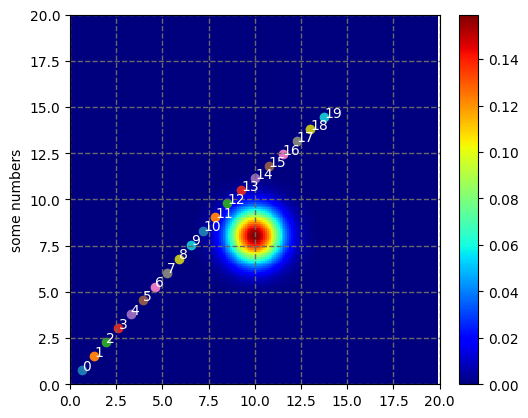

In [318]:
G = gauss_function_2d([Xg, Yg], x0, y0, sigx, sigy)
# G = np.zeros_like(G)
fig = figure()
ax = fig.add_subplot(1,1,1)
box = (x.min(), x.max(), y.min(), y.max())          # left, right, bottom, top
im = ax.imshow(G, interpolation="none", origin='lower', extent=box, cmap='jet') #, vmin = 0, vmax = 0.15
cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
# ax.scatter(x0, y0, marker='x', color='silver', s=50)
ax.grid(color='dimgrey', linestyle='--', linewidth=1)
plt.ylabel('some numbers')
plt.axis([0, FOV_range*2, 0, FOV_range*2])
for i in range(0, len(res.x), 2):
    plt.scatter(res.x[i], res.x[i+1])
    ax.annotate(int(i/2), (res.x[i], res.x[i+1]), color='w')
plt.show()